Interactive Data Visualization - NYC Taxi Trip
--

In the competition, [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration), Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

In this notebook, we'll try to make some visualization using New York City Taxi Trip Duration data. There are many good kernels and discussions related to EDA of NYC Taxi data, however, we'll demonstrate how the ** datashader and bokeh library ** help make large dataset truely practical.

[Datashader](https://github.com/bokeh/datashader) is a data rasterization pipeline for automating the process of creating meaningful representations of large amounts of data. Datashader breaks the creation of images of data into 3 main steps: Projection, Aggregation and Transformation. These aggregates are then further processed, eventually creating an image. Using this very general pipeline, many interesting data visualizations can be created in a performant and scalable way. Datashader contains tools for easily creating these pipelines in a composable manner, using only a few lines of code. Datashader can be used on its own, but it is also designed to work as a pre-processing stage in a plotting library, allowing that library to work with much larger datasets than it would otherwise.

[Bokeh](http://bokeh.pydata.org/en/latest/) is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

** Load NYC Taxi Trip Data **

In [2]:
%time
# We'll load some important columns only
df = pd.read_csv('/home/data/nyc-taxi-trip-duration/train.csv',
                 usecols=['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                          'dropoff_longitude', 'dropoff_latitude',  'trip_duration'])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


In [3]:
# Let's see some records
df.head()

pickup_datetime     dropoff_datetime  passenger_count  \
0  2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1  2016-06-12 00:43:35  2016-06-12 00:54:38                1   
2  2016-01-19 11:35:24  2016-01-19 12:10:48                1   
3  2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4  2016-03-26 13:30:55  2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   trip_duration  
0            455  
1            663  
2           2124  
3            429  
4            435

The training set contains about 1.5 million pickup and dropoff locations with passenger counts and trip durations.

In [4]:
# size of the training set
print('Size:', df.shape[0])

Size: 1458644


In [5]:
from bokeh.plotting import figure, output_notebook, show # bokeh plotting library
# We'll show the plots in the cells of this notebook
output_notebook()

Loading BokehJS ...

In [6]:
import numpy as np # linear algebra and Scientific calculation

# let's find pickup and dropoff longitude and latitude range
print(np.min(df['pickup_longitude']), np.min(df['pickup_latitude']))
print(np.max(df['pickup_longitude']), np.max(df['pickup_latitude']))

print(np.min(df['dropoff_longitude']), np.min(df['dropoff_latitude']))
print(np.max(df['dropoff_longitude']), np.max(df['dropoff_latitude']))

-121.93334198 34.3596954346
-61.3355293274 51.8810844421
-121.933303833 32.1811408997
-61.3355293274 43.9210281372


So, we've x_range (-121.93334198, -61.3355293274) and y_range is (32.1811408997, 51.8810844421). However, most of the rides occur within the x_range (-74.05, -73.7) and y_range (40.6, 40.9). For nice visualation, we'll omit the outliers from the initial plot. But you can explore the data using the zooming facilty of the bokeh plot.

** Let's define a base plot **

In [7]:
# NYC = x_range, y_range = ((-121.93334198, -61.3355293274), (32.1811408997, 51.8810844421))
NYC = x_range, y_range = ((-74.05, -73.7), (40.6, 40.9))

plot_width = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan, wheel_zoom, reset', plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

options = dict(line_color=None, fill_color='blue', size=5)

** Let's make 10K pickup-points scatterplot **

In [8]:
%%time
# let's plot 10k sample pickup
samples = df.sample(n=10000)
p = base_plot()

p.circle(x=samples['pickup_longitude'], y=samples['pickup_latitude'], **options)
show(p)

CPU times: user 128 ms, sys: 4 ms, total: 132 ms
Wall time: 137 ms


This size of plot can be handled by any plotting library. Here the points are initially overplotting each other, but using zooming button, nearly all of them should be ** clearly visible in the bokeh plot **.

** Here is 10K dropoff-points scatterplot **

In [9]:
%%time
# Again, let's plot 10k sample dropoff
samples = df.sample(n=10000)
p = base_plot()

p.circle(x=samples['dropoff_longitude'], y=samples['dropoff_latitude'], **options)
show(p)

CPU times: user 148 ms, sys: 4 ms, total: 152 ms
Wall time: 155 ms


We've plotted a subsample of data in the above figures and those are not so densed. When datasize grows to include millions and billions of points, traditional visualization techniques break down. Whether you're loading the data into limited memory, or separating the signal from the noise when thousands of data points occupy each pixel, as data gets big, visualization gets challenging.

** Datashader ** deconstructs the classical infovis pipeline to place statistical processing at the heart of the visualization task. The result is a scalable, interactive system that is easy to use and produces perceptually accurate renderings of extremely large datasets.

In [10]:
import datashader as ds
from datashader import transfer_functions as tr_fns
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:2]

/home/a_khanss/anaconda3/envs/keras/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [11]:
%%time
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude', ds.count('passenger_count'))
img = tr_fns.shade(agg, cmap=["white", 'darkblue'], how='linear')

CPU times: user 408 ms, sys: 4 ms, total: 412 ms
Wall time: 413 ms


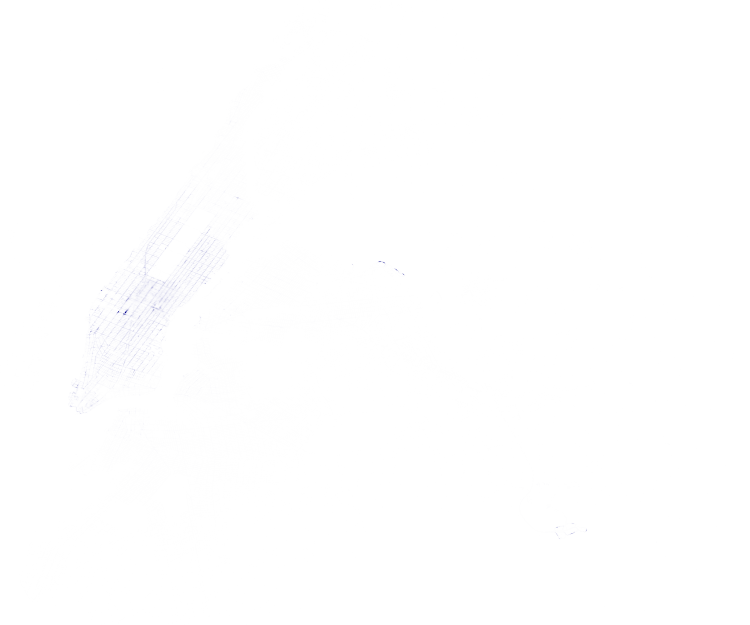

In [12]:
img

In [13]:
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude', ds.count('passenger_count'))
    img = tr_fns.shade(agg, cmap=Hot, how='eq_hist')
    return tr_fns.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(*NYC), "NYCT_hot")
InteractiveImage(p, create_image)

In [14]:
from functools import partial

def create_image90(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude', ds.count('passenger_count'))
    img = tr_fns.shade(agg.where(agg > np.percentile(agg, 90)), cmap=inferno, how='eq_hist')
    return tr_fns.dynspread(img, threshold=0.3, max_px=4)
    
p = base_plot()
export(create_image(*NYC), "NYCT_90th")
InteractiveImage(p, create_image90)

In [15]:
def merged_images(x_range, y_range, w=plot_width, h=plot_height, how='log'):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    picks = cvs.points(df, 'pickup_longitude', 'pickup_latitude', ds.count('passenger_count'))
    drops = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude', ds.count('passenger_count'))
    more_drops = tr_fns.shade(drops.where(drops > picks), cmap=["darkblue", 'cornflowerblue'], how=how)
    more_picks = tr_fns.shade(drops.where(picks > drops), cmap=["darkred", 'orangered'], how=how)
    img = tr_fns.stack(more_picks, more_drops)
    return tr_fns.dynspread(img, threshold=0.3, max_px=4)

p = base_plot(background_fill_color=background)
export(merged_images(*NYC), "NYCT_pickups_vs_drops")
InteractiveImage(p, merged_images)

/home/a_khanss/anaconda3/envs/keras/lib/python3.6/site-packages/toolz/functoolz.py:655: RuntimeWarning: invalid value encountered in over
  return func(b, a)


** Reference: **
- I used Peter Wang's talk "Interactive Viz of a Billion Points with Bokeh Datashader" at PLOTCON 2016 (https://www.youtube.com/watch?v=fB3cUrwxMVY)